# **Classical Algorithm: Gated Recurrent Unit**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

In [ ]:
# Mounting the dataset
dataset_path = '/content/drive/MyDrive/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
data = pd.read_csv(dataset_path)

In [ ]:
# Features and Target
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux',
    'h_alpha_flux_err', 'nii_6584_flux', 'nii_6584_flux_err', 'log_stellar_sigma', 'psfMag_u',
    'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r',
    'psfMagErr_i', 'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16', 'mendel_logM_p84',
    'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84', 'mendel_logMb_p50',
    'mendel_logMb_p16', 'mendel_logMb_p84', 'mendel_logMd_p50', 'mendel_logMd_p16',
    'mendel_logMd_p84', 'simard_b_t_g', 'simard_e_b_t_g', 'simard_b_t_r', 'simard_e_b_t_r',
    'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r', 'simard_Re',
    'simard_e_Re', 'simard_e', 'simard_e_e', 'simard_nb', 'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]
target = 'log_bh_mass'

In [ ]:
# Handling Missing/NaN values
data.fillna(data.mean(), inplace=True)

# Separate features and target
X = data[features]
y = data[target]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to numpy arrays
X_scaled = np.array(X_scaled)
y = np.array(y)

# Reshape for GRU
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Define the GRU model
def build_gru_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.GRU(50, input_shape=input_shape, return_sequences=True),
        tf.keras.layers.GRU(50),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Build and train the model
model = build_gru_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Range of the target variable
y_range = np.max(y_test) - np.min(y_test)

# Calculate accuracy by percentage
mse_accuracy = (1 - mse / y_range) * 100
mae_accuracy = (1 - mae / y_range) * 100
rmse_accuracy = (1 - rmse / y_range) * 100

# Print evaluation metrics
print(f'MSE - Value: {mse:.4f}, Accuracy: {mse_accuracy:.2f}%')
print(f'MAE - Value: {mae:.4f}, Accuracy: {mae_accuracy:.2f}%')
print(f'RMSE - Value: {rmse:.4f}, Accuracy: {rmse_accuracy:.2f}%')
print(f'R2 - Value: {r2:.4f}')

MSE - Value: 0.0897, Accuracy: 97.83%
MAE - Value: 0.1876, Accuracy: 95.46%
RMSE - Value: 0.2995, Accuracy: 92.76%
R2 - Value: 0.7784


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


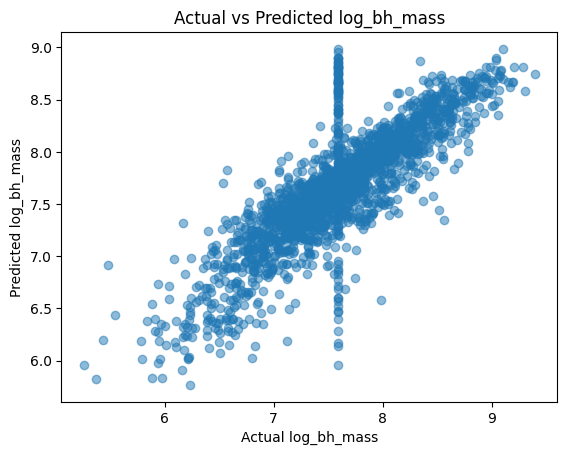

In [ ]:
# Plotting actual vs predicted
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = build_gru_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Predicted log_bh_mass')
plt.title('Actual vs Predicted log_bh_mass')
plt.show()